In this project, I Formulated ideas on how the combination of ratings and tags by users helps the data set to establish additional value using exploratory data analysis. I also used K-Means clustering models to determine similar movies to recommend using the other ratings and tags of movies by other users as feature

In this project, I Downloaded one of the MovieLens datasets for research use from https://grouplens.org/datasets/movielens/. I will load the .csv and analyze it in order to get the most useful features to make to make movie recommendation system more accurate.

Changing the directory to the required dataset

In [5]:
cd ml-25m/

/Users/danaalmansour/Desktop/ml-25m


fetching the directory of dataset

In [6]:
ls

README.txt         genome-tags.csv    movies.csv         tags.csv
genome-scores.csv  links.csv          ratings.csv


In [48]:
#importing the necessary libraries to perform the operation
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

movies.csv consists of three columns 'movieId', 'title' and 'geners' of type int and object respectively. Since, movie title and it's Id will have the same information, I will drop 'title'. There are total 62423 movies in this data frame.

In [69]:
movie = pd.read_csv('movies.csv')# Loading movie.csv file

In [81]:
movie.info()#check for datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


In [72]:
movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [73]:
movie.shape

(62423, 3)

In [74]:
movie['genres'].nunique()

1639

rating.csv consist of total 4 columns 'userId', 'movieId', 'rating' and 'timestamp'. The columns have int or float type. Since movies.csv and rating.csv have one commun column which is 'movieId', I will merge these both data frame in one data frame by 'movieId'. So, I created a new data frame and named it 'movie_rate' by merging these two data frames.

In [15]:
rating =  pd.read_csv('ratings.csv') #loading rating.csv

In [82]:
rating.info()#checking for datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000095 entries, 0 to 25000094
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 762.9 MB


I am merging two datafrmes on movieId and giving a name "movie_rate"

In [78]:
movie_rate = pd.merge(movie, rating, on='movieId',how='left') 

In [76]:
movie_rate.isnull().sum() #checking for null

movieId         0
title           0
genres          0
userId       3376
rating       3376
timestamp    3376
dtype: int64

In [77]:
movie_rate.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2.0,3.5,1.141416e+09
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.0,4.0,1.439472e+09
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0,3.0,1.573944e+09
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5.0,4.0,8.586259e+08
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8.0,4.0,8.904925e+08


'timestamp' has no good in improving the accuracy of our recommendation system. So, I will to drop that column. same scenario follows here since 'movieId' and 'title' are both representing same information, I will drop one of them. I will drop 'title' becauase it's type is object and I want to use numerical values for this project.

In [20]:
movie_rate = movie_rate.drop(['title', 'timestamp'], axis = 1) # removing two columns

In [21]:
movie_rate.head()

,movieId,genres,userId,rating
0,1,Adventure|Animation|Children|Comedy|Fantasy,2.0,3.5
1,1,Adventure|Animation|Children|Comedy|Fantasy,3.0,4.0
2,1,Adventure|Animation|Children|Comedy|Fantasy,4.0,3.0
3,1,Adventure|Animation|Children|Comedy|Fantasy,5.0,4.0
4,1,Adventure|Animation|Children|Comedy|Fantasy,8.0,4.0


I will creat one new data frame named 'movieavg' which consist of 'movieId' and its average rating stored in 'rating', to calculate the average rating of movie ignoring particular user.

In [22]:
movieavg = movie_rate.groupby('movieId', as_index=False)['rating'].mean() #calculating average rating

In [23]:
movieavg.shape

(62423, 2)

In [24]:
movieavg.head()

,movieId,rating
0,1,3.893708
1,2,3.251527
2,3,3.142028
3,4,2.853547
4,5,3.058434


Movieavg dataframe will contain movieId, title, geners and average rating of a perticular movie.

In [79]:
movieavg = pd.merge(movie, movieavg, on='movieId',how='left')

In [26]:
movieavg.shape

(62423, 4)

In [27]:
movieavg.head(5)

,movieId,title,genres,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.893708
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.251527
2,3,Grumpier Old Men (1995),Comedy|Romance,3.142028
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.853547
4,5,Father of the Bride Part II (1995),Comedy,3.058434


you can see above tha I modified a table consist of 'movieId', 'genres' and its 'rating'. There are total 62423 movie entries.

Moving to a new .CSV file
g_tags.csv have two column 'tagId' and 'tag' of type int and object.

In [29]:
g_tags = pd.read_csv('genome-tags.csv') # loading g_tags.csv

In [30]:
g_tags.head()

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


In [31]:
g_tags.info() #checking for datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tagId   1128 non-null   int64 
 1   tag     1128 non-null   object
dtypes: int64(1), object(1)
memory usage: 17.8+ KB


g_scores.csv consist of three columns 'movieId', 'tagId' and 'relavance.'. I think tags and its relevance will have a good impact on our movie recommendation system. So I will first merge these two dataset 'g_tag' and 'g_score' on 'tagId' and named it 'tags'.

In [32]:
g_scores = pd.read_csv('genome-scores.csv') # loading genome-scores.csv

In [33]:
g_scores.head()

,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575
4,1,5,0.14075


In [34]:
g_scores.info() #checking for datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15584448 entries, 0 to 15584447
Data columns (total 3 columns):
 #   Column     Dtype  
---  ------     -----  
 0   movieId    int64  
 1   tagId      int64  
 2   relevance  float64
dtypes: float64(1), int64(2)
memory usage: 356.7 MB


We got this dataframe'tagId', 'tag', 'movieId' and 'relavance' by merging g_tags and g_scores.

In [35]:
tags = pd.merge(g_tags, g_scores, on = ['tagId'], how="inner") # merging g_tags and g_scores

In [36]:
tags.head()

,tagId,tag,movieId,relevance
0,1,007,1,0.02875
1,1,007,2,0.04125
2,1,007,3,0.04675
3,1,007,4,0.03425
4,1,007,5,0.04300


I will keep 'movieId' as my index column to perform K-means on movies. So I converted all 'tag' to columns and appropriate relevance score to its value. The new data frame is named 'tag_relavance'.

In [37]:
tag_relavance = pd.pivot_table(tags, index='movieId', columns= 'tag', values='relevance') # creating a whole new dataframe and Converting all tag to columns and make movieId index and relevance as value

In [38]:
tag_relavance.head()

tag,007,007 (series),18th century,1920s,1930s,1950s,1960s,1970s,1980s,19th century,...,world politics,world war i,world war ii,writer's life,writers,writing,wuxia,wwii,zombie,zombies
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.02875,0.02375,0.06250,0.07575,0.14075,0.14675,0.06350,0.20375,0.2020,0.03075,...,0.04050,0.01425,0.03050,0.03500,0.14125,0.05775,0.03900,0.02975,0.08475,0.02200
2,0.04125,0.04050,0.06275,0.08275,0.09100,0.06125,0.06925,0.09600,0.0765,0.05250,...,0.05250,0.01575,0.01250,0.02000,0.12225,0.03275,0.02100,0.01100,0.10525,0.01975
3,0.04675,0.05550,0.02925,0.08700,0.04750,0.04775,0.04600,0.14275,0.0285,0.03875,...,0.06275,0.01950,0.02225,0.02300,0.12200,0.03475,0.01700,0.01800,0.09100,0.01775
4,0.03425,0.03800,0.04050,0.03100,0.06500,0.03575,0.02900,0.08650,0.0320,0.03150,...,0.05325,0.02800,0.01675,0.03875,0.18200,0.07050,0.01625,0.01425,0.08850,0.01500
5,0.04300,0.05325,0.03800,0.04100,0.05400,0.06725,0.02775,0.07650,0.0215,0.02975,...,0.05350,0.02050,0.01425,0.02550,0.19225,0.02675,0.01625,0.01300,0.08700,0.01600


In [39]:
print(tag_relavance.shape)

(13816, 1128)


YOu can see now that there are total 1128 columns in 'tag_relevance' dataframe and 13816 different movies. Then I will check for'null' values in this dataframe and will further modify it.

In [40]:
tag_relavance.isnull().sum() #checking for null

tag
007             0
007 (series)    0
18th century    0
1920s           0
1930s           0
               ..
writing         0
wuxia           0
wwii            0
zombie          0
zombies         0
Length: 1128, dtype: int64

I will merge dataframes 'movieavg' and 'tag_relevance' and will name the dataframe 'final_table'. So I will have average rating, tag relavance for each tag for each listed movie. These two are going to be useful features for our movie recommnendation system.

In [41]:
final_table = pd.merge(tag_relavance, movieavg, on = ['movieId'], how="left") # merging movieavg and tag_relevance table

In [42]:
final_table.head()

,movieId,007,007 (series),18th century,1920s,1930s,1950s,1960s,1970s,1980s,...,writer's life,writers,writing,wuxia,wwii,zombie,zombies,title,genres,rating
0,1,0.02875,0.02375,0.06250,0.07575,0.14075,0.14675,0.06350,0.20375,0.2020,...,0.03500,0.14125,0.05775,0.03900,0.02975,0.08475,0.02200,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.893708
1,2,0.04125,0.04050,0.06275,0.08275,0.09100,0.06125,0.06925,0.09600,0.0765,...,0.02000,0.12225,0.03275,0.02100,0.01100,0.10525,0.01975,Jumanji (1995),Adventure|Children|Fantasy,3.251527
2,3,0.04675,0.05550,0.02925,0.08700,0.04750,0.04775,0.04600,0.14275,0.0285,...,0.02300,0.12200,0.03475,0.01700,0.01800,0.09100,0.01775,Grumpier Old Men (1995),Comedy|Romance,3.142028
3,4,0.03425,0.03800,0.04050,0.03100,0.06500,0.03575,0.02900,0.08650,0.0320,...,0.03875,0.18200,0.07050,0.01625,0.01425,0.08850,0.01500,Waiting to Exhale (1995),Comedy|Drama|Romance,2.853547
4,5,0.04300,0.05325,0.03800,0.04100,0.05400,0.06725,0.02775,0.07650,0.0215,...,0.02550,0.19225,0.02675,0.01625,0.01300,0.08700,0.01600,Father of the Bride Part II (1995),Comedy,3.058434


In [43]:
print(final_table.shape)

(13816, 1132)


In [44]:
final_table['movieId'].nunique()

13816

Since 'genres' is a type String, I will convert it to any number type by using Label Encoder which converts each geners to appropriate unique number.

In [45]:
# converting genres to integer type
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
final_table['genres_up'] = labelencoder.fit_transform(final_table['genres'])

In [46]:
final_table = final_table.drop('genres', axis = 1) # dropping old genres
final_table1 = final_table.drop('title', axis = 1) # dropping title since movieId is the integer version of title.
y = final_table1.iloc[:,0]
final_table = final_table1.drop(['movieId'], axis = 1)# dropping movieId before PCA application

I will first standardize the data because I will find the optimum number of features which has a high amount of variance.

In [49]:
data_std = StandardScaler().fit_transform(final_table)

In [50]:
from sklearn.preprocessing import StandardScaler
fn = StandardScaler().fit_transform(final_table)

([<matplotlib.axis.XTick at 0x1230de7f0>,
 <a list of 20 Text major ticklabel objects>)

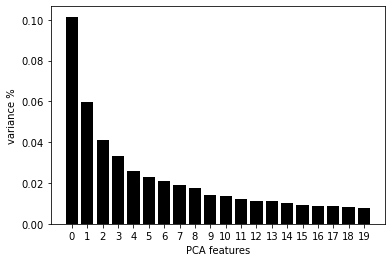

In [52]:
#apply PCA to final_table
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
principalComponents = pca.fit_transform(fn)

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

In [53]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(fn)

The Figure shows that the first four features explain the majority of the variance in our data. For the visualization, we will draw scatter plot by taking two features into consideration.

In [83]:
PCA_components = pd.DataFrame(principalComponents)

I will use K-Means from scikit learn library to apply K-Means on this final table and will choose number of cluster = 50. After tha, I will train the model on 'final_table' data frame. 

I will use Elbow method for finding the total number of clusters for k-means

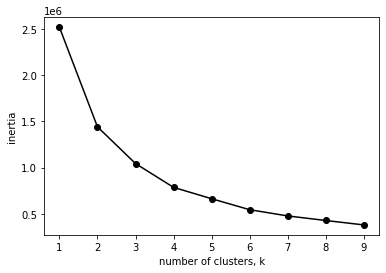

In [55]:
from sklearn.cluster import KMeans #add KMeans library
ks = range(1, 10)
inertias = []
for k in ks:
    # Creating a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fitting model to samples
    model.fit(PCA_components.iloc[:,:4])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

The figure shows that number of cluster = 5

In [57]:
#defining KMeans
km = KMeans( n_clusters=5, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)

In [58]:
#Applying KMeans
Y_km = km.fit_predict(PCA_components)

In [59]:
PCA_components = PCA_components.iloc[:].values

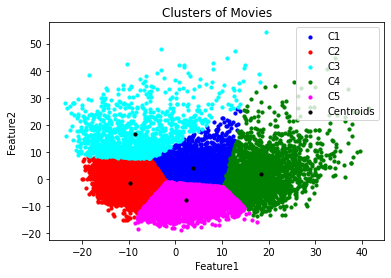

In [60]:
# scatter plot for K-Mean cluster 
plt.scatter(PCA_components[Y_km == 0, 0], PCA_components[Y_km == 0,1],s = 10, c='blue', label = 'C1')

plt.scatter(PCA_components[Y_km == 1, 0], PCA_components[Y_km == 1,1],s = 10, c='red', label = 'C2')

plt.scatter(PCA_components[Y_km == 2, 0], PCA_components[Y_km == 2,1],s = 10, c='cyan', label = 'C3')

plt.scatter(PCA_components[Y_km == 3, 0], PCA_components[Y_km == 3,1],s = 10, c='green', label = 'C4')

plt.scatter(PCA_components[Y_km == 4, 0], PCA_components[Y_km == 4,1],s = 10, c='magenta', label = 'C5')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s = 10, c = 'black', label = 'Centroids')
   
plt.title('Clusters of Movies')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.legend()
plt.show()

I created 'labels' for each 5 clusters, and result will be stored in result data frame which consists of 'movieId' and 'Cluster ID' columns according to the clustering result.

In [62]:
labels = km.labels_

In [63]:
result = pd.DataFrame(labels, index=final_table1.movieId, columns=['Cluster ID'])

In [64]:
result.head()

,Cluster ID
movieId,
1,2
2,2
3,1
4,1
5,1


In [80]:
result = pd.merge(movie, result, on=['movieId'])

In [66]:
result.head(5)

,movieId,title,genres,Cluster ID
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2
1,2,Jumanji (1995),Adventure|Children|Fantasy,2
2,3,Grumpier Old Men (1995),Comedy|Romance,1
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1
4,5,Father of the Bride Part II (1995),Comedy,1


In [67]:
recommendation = result.groupby ('Cluster ID').agg ({'title':lambda x: ', '.join (x)}).reset_index ()

In [68]:
recommendation.head()

,Cluster ID,title
0,0,"American President, The (1995), Nixon (1995), ..."
1,1,"Grumpier Old Men (1995), Waiting to Exhale (19..."
2,2,"Toy Story (1995), Jumanji (1995), GoldenEye (1..."
3,3,"Heat (1995), Casino (1995), Leaving Las Vegas ..."
4,4,"Sense and Sensibility (1995), Othello (1995), ..."


I have merged 'movie' and 'result' in order to have a better understanding of the Cluster ID with respect to 'title' instead of 'movie'. Also, I have created other data frame 'recommendations' for better understanding and visualization

In conclusion, our K-means is working because we can see for example Toy Story and Jumanji are in the same group because they have the same genre.